In [9]:
from huggingface_hub import hf_hub_download
import fasttext
import numpy as np
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import euclidean_distances

In [12]:
model = fasttext.load_model(hf_hub_download("facebook/fasttext-en-vectors", "model.bin"))

### Exploring embeddings around feminism

Since many of today's large scale AI/ML models are built on some sort of input embedding -- which takes human-readable/understandable inputs and maps them to some multi-dimensional representative space (much less transparent!), let's take some time exploring this intransparent space by investigating what's near feminism, identities and realities in a not always so feminist world.

In [13]:
model['feminism']

array([ 0.02678143, -0.00353684,  0.01381772,  0.00596085,  0.02891254,
       -0.11198819,  0.02797039,  0.02134818, -0.07059024,  0.02400818,
        0.09692445, -0.02212198,  0.02144069, -0.05681823,  0.03355433,
       -0.01360292, -0.02102624, -0.07297309,  0.07791328,  0.05127743,
        0.02282899,  0.00185156, -0.00044894,  0.0009513 ,  0.01840483,
        0.04201579, -0.06890506,  0.04650574,  0.00187001,  0.14876586,
       -0.03576516, -0.03372364,  0.03770614,  0.00435212,  0.03939367,
       -0.02530807,  0.04284175,  0.00569184, -0.04743826, -0.01793975,
        0.04134011, -0.04805966, -0.06746754, -0.0300882 , -0.06349395,
       -0.04741967,  0.02460077,  0.02172125,  0.02234406, -0.03771369,
        0.00761514,  0.02614597,  0.04788882,  0.05160837,  0.02384743,
       -0.03084107,  0.09231245,  0.02081098, -0.05271717,  0.0046657 ,
       -0.01658326, -0.15089461, -0.05049523,  0.03775992,  0.07006467,
        0.00577049,  0.04534005,  0.02304992,  0.00038593,  0.01

In [14]:
model.get_nearest_neighbors("feminism", k=5)

[(0.8146167397499084, 'feminist'),
 (0.8099604249000549, 'Feminism'),
 (0.7836004495620728, 'feminists'),
 (0.7827267050743103, 'anti-feminism'),
 (0.7778789401054382, 'post-feminism')]

What other words do you want to explore, have a look around!

### Comparing embeddings: A look at distance measurements

When comparing embeddings we have to try to see how to measure things in many-dimensional space -- again, not very transparent! Let's take a look at a few ways we can do this and explore how "similar" or "close" ideas are in this space..

To do so, we'll look at [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity) which measures from -1 (total opposite) to 1 (totally the same) and [scikit-learn's euclidean distances](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.euclidean_distances.html#sklearn.metrics.pairwise.euclidean_distances) which measures [euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance) (think Hypotenuse!) between the two vectors in this multidimensional space.

In [15]:
def cosine_similarity(word1, word2):
    return np.dot(model[word1], model[word2]) / (np.linalg.norm(model[word1]) * np.linalg.norm(model[word2]))

In [17]:
cosine_similarity('feminist', 'sexist')

np.float32(0.5698285)

In [18]:
cosine_similarity('feminist', 'revolutionary')

np.float32(0.36046383)

In [21]:
euclidean_distances([model['feminist']], [model['sexist']])

array([[0.9317156]], dtype=float32)

In [20]:
euclidean_distances([model['feminist']], [model['revolutionary']])

array([[0.76586336]], dtype=float32)

What other words do you want to explore or compare? 

### Projection into 2-dimensional space 

To better understand what's happening with these embeddings, you can take a look at how these work in a reduced dimension (here: 2). In this case, you obviously lose extra information in the embedding, so it's not a true representation. That said, it can still be useful to do for interpretability, presuming you keep the limitations in mind.

To get started, make a list of embeddings you want to compare.

In [22]:
words = [
    'feminist',
    'sexist', 
    'woman',
    'transwoman',
    'cisgender',
    'agender',
    'man',
    'transman',
    'computer scientist',
    'data scientist',
    'AI',
    'computer',
    'model',
]

In [23]:
embedding_list = np.array([model[w] for w in words])

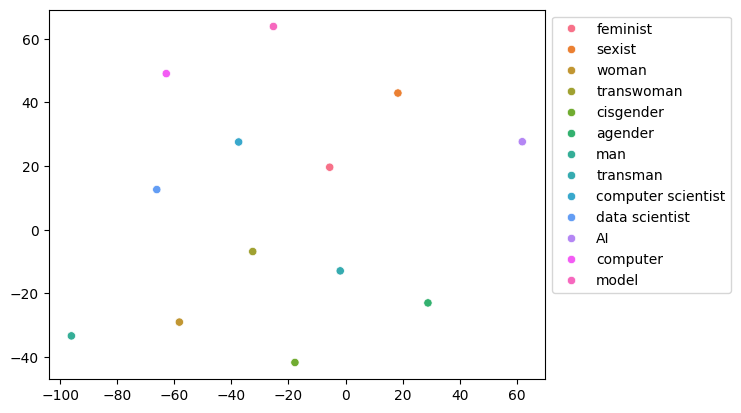

In [27]:
tsne = TSNE(n_components=2, random_state=0, perplexity=10).fit_transform(embedding_list)
ax = sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=np.array(words))
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))

To visualize more holistically, you could also take a series of documents and generate many examples, perhaps classified into categories (feminist/not-feminist or other less binary dichotomies). This can help you determine what models "learn" and what they don't.

What did you find? Compare with others and spark new lists for ideas and comparisons. Knowing this, how might you change your prompts or interactions with embeddings?

To explore embeddings more, you can also investigate other model embeddings via APIs, like:

- [Mistral AI's embeddings](https://docs.mistral.ai/capabilities/embeddings/)
- [OpenAI's embeddings](https://openai.com/index/introducing-text-and-code-embeddings/)
